In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [94]:
data = 'data/weight-height.csv'
wh_df = pd.read_csv(data)

In [95]:
wh_df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [96]:
wh_df['Height'] = wh_df['Height'] * 2.54
wh_df['Weight'] = wh_df['Weight'] * 0.5

wh_df.head()

Gender      Height      Weight
0   Male  187.571423  120.946782
1   Male  174.706036   81.155236
2   Male  188.239668  106.370428
3   Male  182.196685  110.021235
4   Male  177.499761  103.174900

In [71]:
# wh_df['Height'] = wh_df['Height'].apply(lambda x : x * 2.54)
# wh_df['Weight'] = wh_df['Weight'].apply(lambda x : x * 0.5)

In [97]:
wh_df.shape

(10000, 3)

In [98]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [99]:
wh_df.describe()

Height        Weight
count  10000.000000  10000.000000
mean     168.573602     80.720178
std        9.772721     16.054220
min      137.828359     32.350063
25%      161.304276     67.909026
50%      168.447898     80.606464
75%      175.702625     93.584762
max      200.656806    134.994849

In [100]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

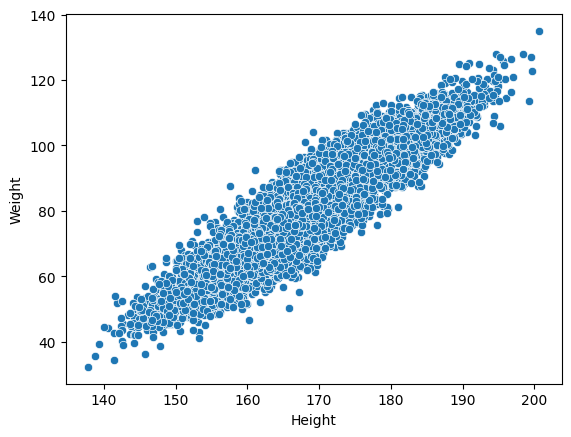

In [101]:
sns.scatterplot(data=wh_df, x='Height', y='Weight')
plt.show()

In [102]:
x = wh_df['Height']
y = wh_df['Weight']

In [103]:
y[:5]

0    120.946782
1     81.155236
2    106.370428
3    110.021235
4    103.174900
Name: Weight, dtype: float64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [105]:
model_lr = LinearRegression()

In [106]:
model_lr.fit(x_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [107]:
x_train.values.reshape(-1, 1)

array([[164.78282287],
       [160.48644845],
       [166.63441499],
       ...,
       [159.75030686],
       [173.76463793],
       [158.41801127]])

In [108]:
model_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [109]:
print('테스트 데이터', x_test.values)
print()
print(x_test.values.reshape(-1,1))

테스트 데이터 [155.11285681 160.05161107 178.82799816 ... 163.38653073 179.6037544
 176.16802731]

[[155.11285681]
 [160.05161107]
 [178.82799816]
 ...
 [163.38653073]
 [179.6037544 ]
 [176.16802731]]


In [110]:
y_pred = model_lr.predict(x_test.values.reshape(-1,1))

In [111]:
y_test[:5]

7878    52.655571
3224    81.345297
1919    97.711355
4432    99.800757
4835    91.277642
Name: Weight, dtype: float64

In [112]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 37.8435396026048
RMSE : 6.151710298982292


In [113]:
model_lr.predict([[169]])

array([81.36486434])

In [114]:
model_lr.predict(np.array([166,169]).reshape(-1,1))

array([76.80884355, 81.36486434])

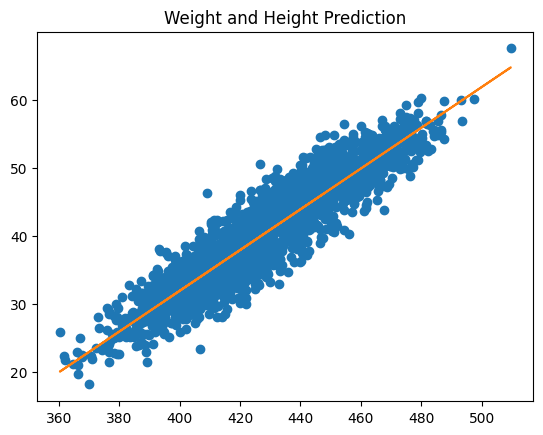

In [91]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [116]:
data = 'data/weight-height.csv'
gwh_df = pd.read_csv(data)
gwh_df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [117]:
gwh_df['Height'] = gwh_df['Height'] * 2.54
gwh_df['Weight'] = gwh_df['Weight'] * 0.4563

gwh_df.head()

Gender      Height      Weight
0   Male  187.571423  110.376033
1   Male  174.706036   74.062269
2   Male  188.239668   97.073652
3   Male  182.196685  100.405379
4   Male  177.499761   94.157414

<Figure size 1000x600 with 0 Axes>

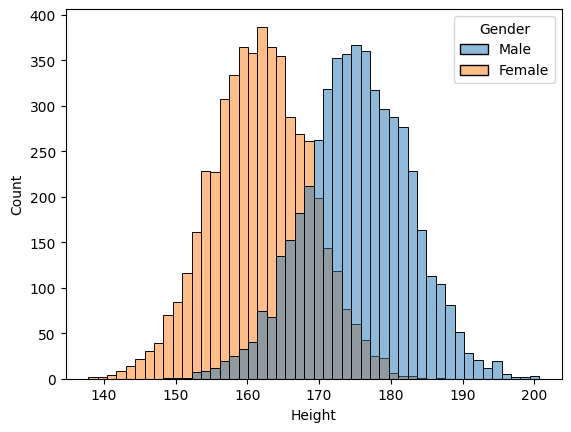

<Figure size 1000x600 with 0 Axes>

In [118]:
sns.histplot(data=gwh_df, x='Height', hue='Gender')
plt.figure(figsize=(10,6))

In [119]:
df_OHE = pd.get_dummies(gwh_df, columns=['Gender'])
df_OHE

Height      Weight  Gender_Female  Gender_Male
0     187.571423  110.376033          False         True
1     174.706036   74.062269          False         True
2     188.239668   97.073652          False         True
3     182.196685  100.405379          False         True
4     177.499761   94.157414          False         True
...          ...         ...            ...          ...
9995  168.078536   62.411552           True        False
9996  170.350573   77.967025           True        False
9997  162.224700   58.623288           True        False
9998  175.346978   74.765878           True        False
9999  157.338385   51.858086           True        False

[10000 rows x 4 columns]

In [120]:
X = df_OHE.drop(columns='Weight')
y = df_OHE['Weight']

In [122]:
X.head()

Height  Gender_Female  Gender_Male
0  187.571423          False         True
1  174.706036          False         True
2  188.239668          False         True
3  182.196685          False         True
4  177.499761          False         True

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
X_train

Height  Gender_Female  Gender_Male
9254  155.934775           True        False
1561  189.731998          False         True
1670  174.009850          False         True
6087  167.125690           True        False
6669  170.590986           True        False
...          ...            ...          ...
5734  160.908969           True        False
5191  149.508528           True        False
5390  163.386531           True        False
860   175.449210          False         True
7270  171.675653           True        False

[8000 rows x 3 columns]

In [125]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model_lr2.predict(X_test)
y_pred

array([75.55642225, 84.77185534, 78.14549722, ..., 57.84501902,
       79.97209066, 48.15240468])

In [127]:
X_test.columns

Index(['Height', 'Gender_Female', 'Gender_Male'], dtype='object')

In [130]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 21.08003941812068
RMSE : 4.591300405998357


In [132]:
my_test = pd.DataFrame({'Height':[165,176], 'Gender_Female':[1,0], 'Gender_Male':[0,1]})
my_test

Height  Gender_Female  Gender_Male
0     165              1            0
1     176              0            1

In [133]:
model_lr2.predict(my_test)

array([65.39940251, 86.03106994])

In [134]:
X_test[:5]

Height  Gender_Female  Gender_Male
6252  174.465570           True        False
4684  174.826508          False         True
1731  168.651246          False         True
4742  182.700524          False         True
4521  170.288974          False         True

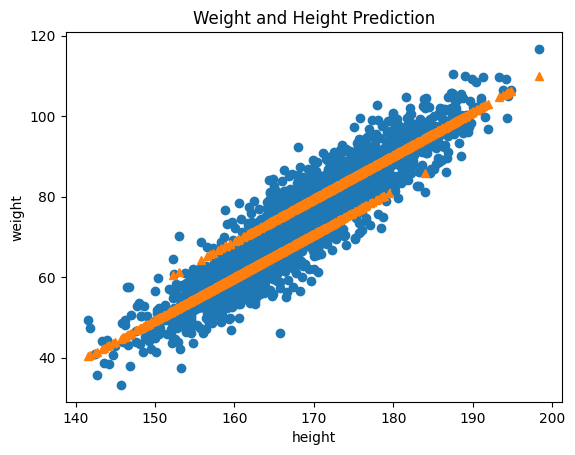

In [135]:
plt.plot(X_test.loc[:, 'Height'], y_test, 'o')
plt.plot(X_test.loc[:,'Height'], y_pred, '^')
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()